In [1]:
%matplotlib inline
from astropy import units as u
import pylab as pl
from spectral_cube import SpectralCube
from scipy.ndimage import binary_erosion, binary_dilation
import regions
from grid_strategy import strategies
from astropy.wcs import WCS
from astropy import wcs
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from astropy import visualization

In [2]:
import json
nbooks = '/orange/adamginsburg/salt/notebooks'
with open(f'{nbooks}/distance_map.json', 'r') as fh:
    distance_dict = json.load(fh)
for key in distance_dict:
    distance_dict[key] = float(distance_dict[key].split("$")[0])

In [3]:
distance_dict

{'Orion SrcI': 0.4,
 'G17': 2.2,
 'IRAS18162 GGD27': 1.3,
 'G5.89 mm15': 3.0,
 'G351.77mm1': 2.2,
 'G351.77mm2': 2.2,
 'G351.77mm12': 2.2,
 'I16547A': 2.9,
 'I16547B': 2.9,
 'NGC6334IN SMA6': 1.3,
 'NGC6334IN SMA1b/d': 1.3,
 'NGC6334Imm2b': 1.3,
 'NGC6334Imm1b': 1.3,
 'NGC6334Imm1d': 1.3,
 'G11.92mm1': 3.3,
 'IRAS18089 I18089-1732': 2.3,
 'IRAS16562 G345.4938+01.4677': 2.3,
 'G333.23mm1': 5.3,
 'G333.23mm2': 5.3,
 'G335 ALMA1': 3.3,
 'G29.96 submm1': 7.4,
 'W33A mm1-main': 2.6,
 'S255IR SMA1': 1.6,
 'G34.43mm1': 1.6}

In [4]:
m0s = {}

In [5]:
naclv1ori = SpectralCube.read('https://zenodo.org/record/2365835/files/OrionSourceI_U232.511_robust0.5maskedclarkclean10000_medsub_K.fits')
naclv1ori.beam_threshold=1
oripxscale = naclv1ori.wcs.proj_plane_pixel_scales()[0]
oripxscale_au = (oripxscale * 400*u.pc).to(u.au, u.dimensionless_angles())
oripxscale_au
m0ori = naclv1ori[:,28:100,30:102].moment0()
m0s['Orion SrcI'] = m0ori

/blue/adamginsburg/adamginsburg/repos/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -6.517e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.164e+03 [aplpy.core]


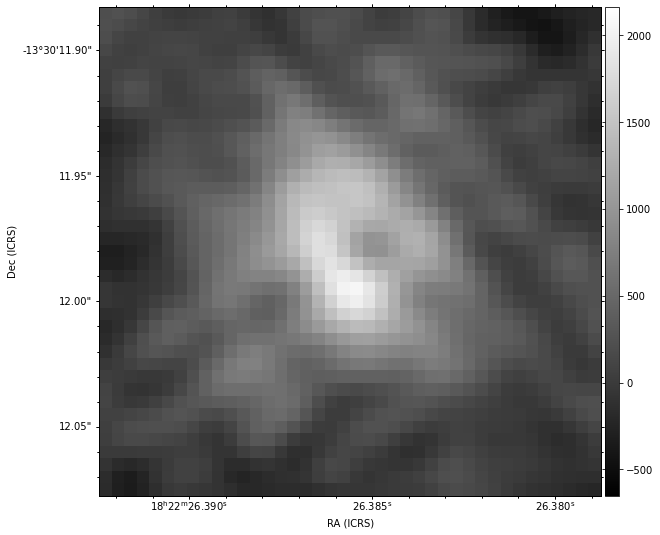

In [6]:
stackc_g17 = SpectralCube.read('../maud/NaCl_v_le_3_stackcube.fits')
# slcs = slice(None), slice(6,-10), slice(10,-13)
# m3d = (stackc_g17[slcs] > 35*u.K).include()
# m3d = binary_erosion(m3d, iterations=2)
# m3d = binary_dilation(m3d, iterations=3)
# m3d = m3d.compute()
# 
# m0 = stackc_g17[slcs].with_mask(m3d).moment0()
m0g17 = stackc_g17.moment0()
m0s['G17'] = m0g17[58:-62, 58:-62]
m0s['G17'].quicklook()

INFO: Auto-setting vmin to -1.300e+03 [aplpy.core]
INFO: Auto-setting vmax to  3.250e+03 [aplpy.core]
INFO: Auto-setting vmin to -1.154e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.167e+03 [aplpy.core]
INFO: Auto-setting vmin to -1.040e+03 [aplpy.core]
INFO: Auto-setting vmax to  3.253e+03 [aplpy.core]


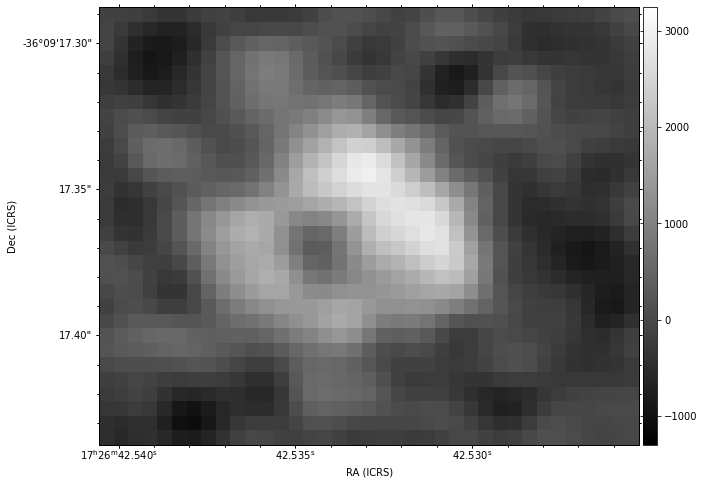

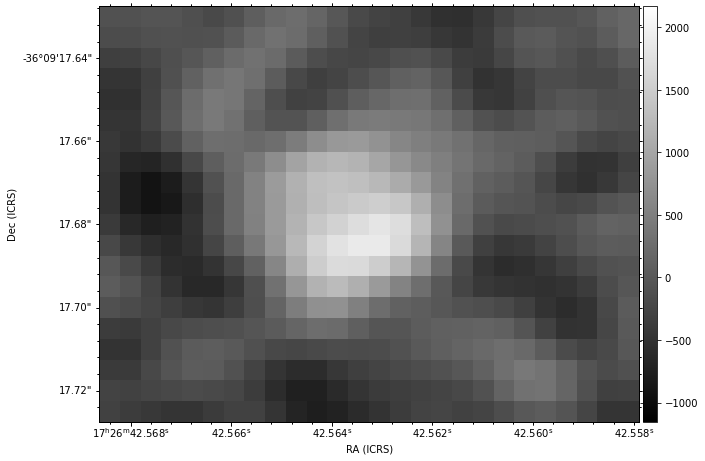

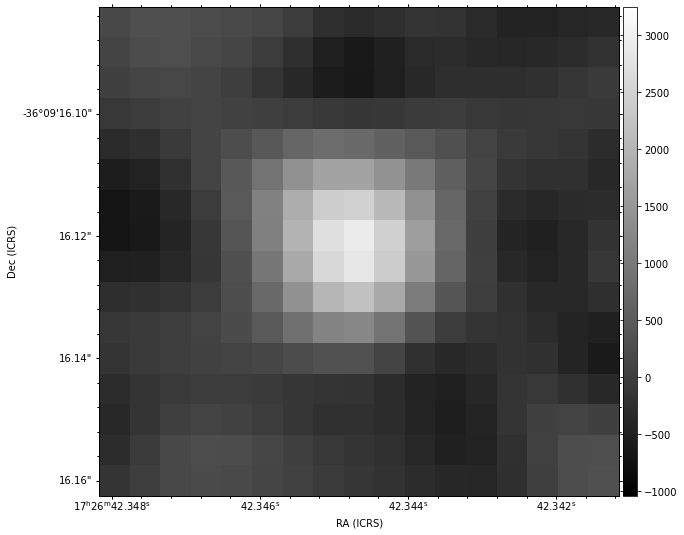

In [7]:
stackc_g351mm1 = SpectralCube.read('../beuther/NaCl_v_le_3_stackcube_disk1.fits')
stackc_g351mm2 = SpectralCube.read('../beuther/NaCl_v_le_3_stackcube_disk2.fits')
stackc_g351mm12 = SpectralCube.read('../beuther/NaCl_v_le_3_stackcube_disk3.fits')
m0g351mm1 = stackc_g351mm1[:,:,:].moment0()
m0g351mm2 = stackc_g351mm2[:,:,:].moment0()
m0g351mm12 = stackc_g351mm12[:,:,:].moment0()
m0s['G351.77mm1'] = m0g351mm1
m0s['G351.77mm2'] = m0g351mm2[2:,:]
m0s['G351.77mm12'] = m0g351mm12[8:-2,9:-7]
m0s['G351.77mm1'].quicklook()
m0s['G351.77mm2'].quicklook()
m0s['G351.77mm12'].quicklook()

INFO: Auto-setting vmin to -3.320e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.077e+03 [aplpy.core]
INFO: Auto-setting vmin to -2.137e+02 [aplpy.core]
INFO: Auto-setting vmax to  4.613e+02 [aplpy.core]


(24, 27)

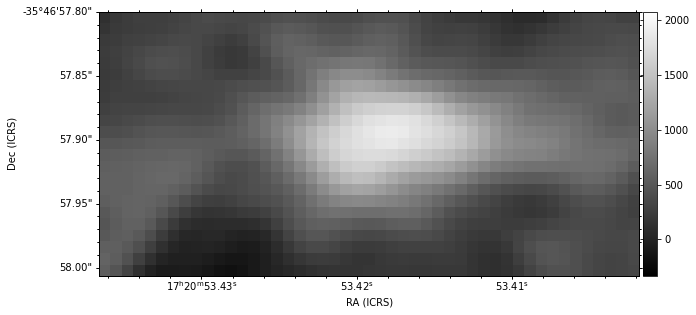

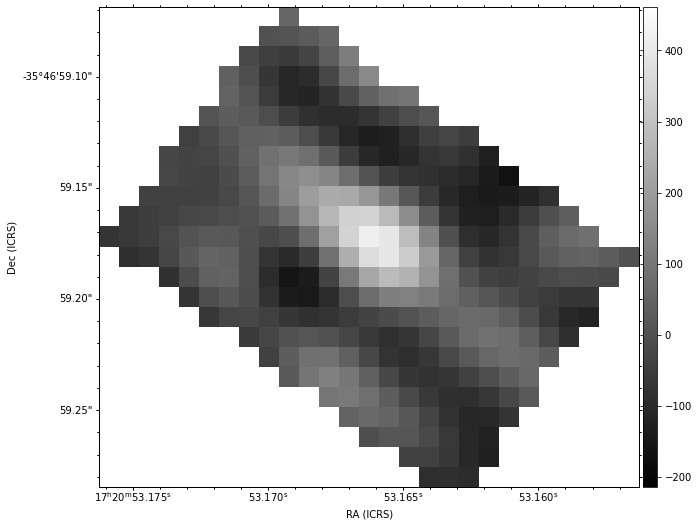

In [8]:
stackc_ngc6334imm2b = SpectralCube.read('../sanhueza/NGC6334I/NaCl_v_le_3_stackcube_mm2.fits')
regngc6334imm2b = regions.Regions.read('../sanhueza/NGC6334I/mm2b.reg')
stackcmm1b = SpectralCube.read('../sanhueza/NGC6334I/NaCl_v_le_3_mm1b_stackcube.fits')
regngc6334imm1b = regions.Regions.read('../sanhueza/NGC6334I/mm1b.reg')
m0_ngc6334imm1b = stackcmm1b.subcube_from_regions(regngc6334imm1b).moment0()[:,10:-10]
m0_ngc6334imm2b = stackc_ngc6334imm2b.subcube_from_regions(regngc6334imm2b).moment0()
m0s['NGC6334Imm1b'] = m0_ngc6334imm1b[8:-8,:]
m0s['NGC6334Imm1b'].quicklook()
m0s['NGC6334Imm2b'] = m0_ngc6334imm2b#[10:-10,10:-10]
m0s['NGC6334Imm2b'].quicklook()
m0s['NGC6334Imm2b'].shape

INFO: Auto-setting vmin to -2.123e+02 [aplpy.core]
INFO: Auto-setting vmax to  8.215e+02 [aplpy.core]


(39, 32)

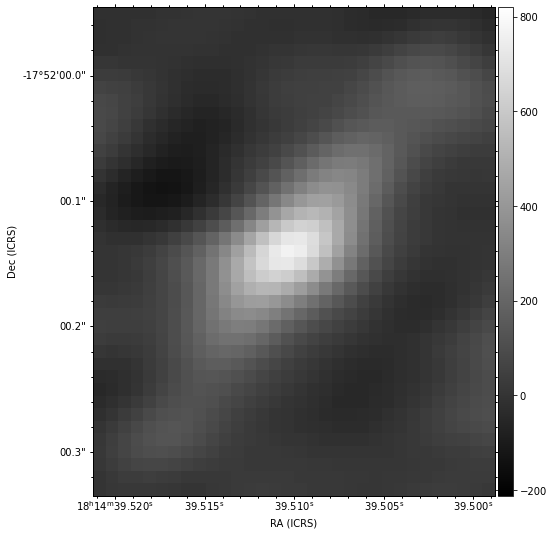

In [9]:
stackc_W33A = SpectralCube.read('../sanhueza/W33A/NaCl_v_le_3_stackcube.fits')
m0_W33A = stackc_W33A.moment0()
m0s['W33A mm1-main'] = m0_W33A[22:-8,17:-10]
m0s['W33A mm1-main'].quicklook()
m0s['W33A mm1-main'].shape

INFO: Auto-setting vmin to -6.095e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.626e+02 [aplpy.core]


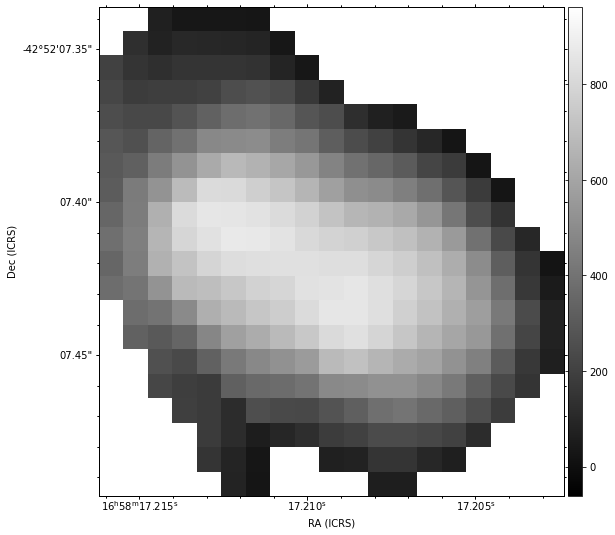

In [10]:
from astropy import coordinates
import scipy, scipy.ndimage
stackc_I16547A = SpectralCube.read('../YichenKei/NaCl_v_le_3_stackcubeA.fits')
stackc_I16547B = SpectralCube.read('../YichenKei/NaCl_v_le_3_stackcubeB.fits')
peakA = coordinates.SkyCoord('16:58:17.2082 -42:52:07.421', frame='icrs', unit=(u.hour, u.deg))
peakB = coordinates.SkyCoord('16:58:17.2173 -42:52:07.461', frame='icrs', unit=(u.hour, u.deg))
peakAcirc = regions.CircleSkyRegion(peakA, radius=0.08*u.arcsec)
peakBcirc = regions.CircleSkyRegion(peakB, radius=0.06*u.arcsec)
i16547areg = regions.Regions.read('../YichenKei/I16547A.reg')
i16547breg = regions.Regions.read('../YichenKei/I16547B.reg')
m3d = (stackc_I16547A > 20*u.K).include()
m3d = binary_erosion(m3d, iterations=1)
m3d = binary_dilation(m3d, iterations=2)
m0_I16547A = stackc_I16547A.with_mask(m3d).subcube_from_regions(i16547areg).moment0()

m0s['I16547A'] = m0_I16547A
m0s['I16547A'].quicklook(use_aplpy=True)

INFO: Auto-setting vmin to -5.112e+01 [aplpy.core]
INFO: Auto-setting vmax to  7.589e+02 [aplpy.core]


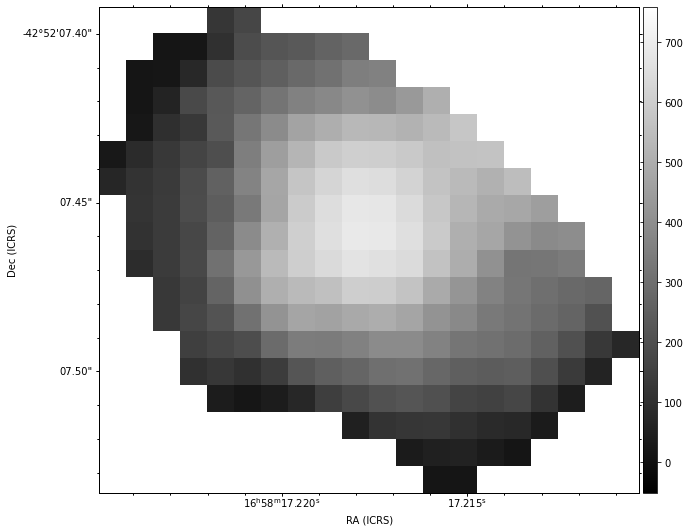

In [11]:
# used in Fig 1 of paper
stackc_I16547A = SpectralCube.read('../YichenKei/NaCl_v_le_3_stackcubeA.fits')
m3db = (stackc_I16547A > 15*u.K).include()
m3db = binary_erosion(m3db, iterations=1)
m3db = binary_dilation(m3db, iterations=2)
m0_I16547B = stackc_I16547A.with_mask(m3db).subcube_from_regions(i16547breg).spectral_slab(-55*u.km/u.s, -22*u.km/u.s).moment0()

#m0_I16547B = stackc_I16547B.moment0()
m0s['I16547B'] = m0_I16547B
m0s['I16547B'].quicklook(use_aplpy=True)

In [12]:
# Goal is to make an image where everything is projected to the same distance...

In [13]:
# probably have to reproject everything to a common physical scale using the smallest pixel scale...

In [14]:
target_header = naclv1ori.wcs.celestial.to_header()
target_header['NAXIS'] = 2
target_header['NAXIS1'] = 300
target_header['NAXIS2'] = 300
target_header['CRVAL1'] = 0
target_header['CRVAL2'] = 0
target_header['CRPIX1'] = 151
target_header['CRPIX2'] = 151
# pixels half-size so Orion looks good
target_header['CDELT1'] = -5.55555554284e-07
target_header['CDELT2'] = 5.55555554284e-07

In [15]:
import reproject

<Figure size 432x288 with 0 Axes>

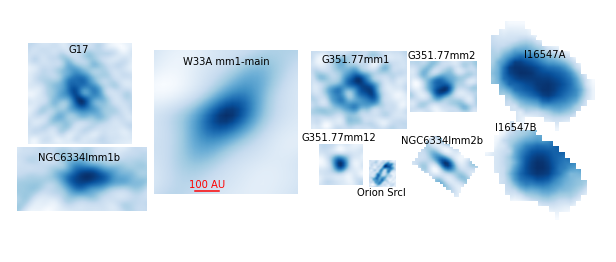

In [16]:
sqgrid = strategies.SquareStrategy()
gridspec = sqgrid.get_grid(len(m0s))
fig = pl.figure(figsize=(12,12))
ww = wcs.WCS(target_header)
ax = pl.subplot(111, projection=ww)
ax.set_visible(False)
corners = [(0, 0), (0, 1), (1, 0), ()]
bboxes = {
'Orion SrcI':  (0.36, 0.44), # srcI
'G17': (0.01, 0.53), # G17
'G351.77mm1': (0.33, 0.535), # G351mm1
'G351.77mm2': (0.43, 0.54), # g351mm2
'G351.77mm12':  (0.31, 0.45), # mm12
'NGC6334Imm2b': (0.43, 0.45), #NGC mm2b
'W33A mm1-main': (0.18, 0.5), # W33
'NGC6334Imm1b': (0.01, 0.43), # ngc6334imm1b
'I16547A': (0.54, 0.55), # I16547A
'I16547B': (0.54, 0.44), # I16547B
}
textloc = {'Orion SrcI': (0.5, 0.35),
           'G17': (0.5, 0.8),
           'G351.77mm1': (0.5, 0.7),
           'G351.77mm2': (0.5, 0.7),
           'G351.77mm12': (0.5, 0.67),
           'NGC6334Imm2b': (0.5, 0.65),
           'W33A mm1-main': (0.5, 0.9),
           'NGC6334Imm1b': (0.5, 0.65),
           'I16547A': (0.55, 0.65),
           'I16547B': (0.35, 0.80),
          }
for ii, key in enumerate(('G17', 'W33A mm1-main', 'G351.77mm1', 'G351.77mm2', 'NGC6334Imm2b', 'Orion SrcI', 'G351.77mm12', 'NGC6334Imm1b',
                          'I16547A', 'I16547B',)):
    m0 = m0s[key]
    hdu = m0.hdu
    hdu.header['CDELT1'] *= distance_dict[key] / 1.
    hdu.header['CDELT2'] *= distance_dict[key] / 1.
    hdu.header['CRVAL1'] = 0
    hdu.header['CRVAL2'] = 0
    hdu.header['CRPIX1'] = hdu.data.shape[1]//2
    hdu.header['CRPIX2'] = hdu.data.shape[0]//2
    reprd,_ = reproject.reproject_interp(hdu, target_header)
    axins = inset_axes(ax,
                   loc=3, width=2, height=2,
                   bbox_to_anchor=bboxes[key],
                   bbox_transform=fig.transFigure,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                   axes_kwargs=dict(wcs=ww))
    axins.imshow(reprd, origin='lower', cmap='Blues')
    
    ra = axins.coords['ra']
    ra.set_auto_axislabel(False)
    dec = axins.coords['dec']
    ra.set_coord_type('longitude', 180)
    ra.set_ticklabel_visible(False)
    dec.set_ticklabel_visible(False)
    ra.set_ticks_visible(False)
    dec.set_ticks_visible(False)

    tx, ty = textloc[key]
    axins.text(tx, ty, key, ha='center', transform=axins.transAxes, zorder=200)
    axins.set_axis_off()

    if key == 'W33A mm1-main':
        distance = 1*u.kpc
        pixscale_au = (ww.proj_plane_pixel_area()**0.5 * distance).to(u.au, u.dimensionless_angles())

        dp_100 = (100*u.au / pixscale_au).decompose()

        xc_ = 85
        axins.plot([xc_, xc_+dp_100], [6,6], color='r')
        axins.text(xc_ + dp_100/2, 12, f'100 AU', horizontalalignment='center', color='r')
        
# try to cut it out *exactly*
from matplotlib.transforms import Bbox
pl.draw()
bbox = fig.get_tightbbox(fig.canvas.renderer)
# x0, y0, width, height
bbox = Bbox.from_bounds(0.45, 5.9, 7.7, 2.25)
#pl.savefig("OverviewFigure_ProjectedToSameSize.png", bbox_inches=bbox, dpi=100)
pl.savefig("OverviewFigure_ProjectedToSameSize.png", bbox_inches=bbox, dpi=300)
pl.savefig("OverviewFigure_ProjectedToSameSize.pdf", bbox_inches=bbox, dpi=300)
pl.savefig("OverviewFigure_ProjectedToSameSize.svg", bbox_inches=bbox, dpi=300)

In [17]:
for k in m0s.keys():
    print(f"'{k}': ,")

'Orion SrcI': ,
'G17': ,
'G351.77mm1': ,
'G351.77mm2': ,
'G351.77mm12': ,
'NGC6334Imm1b': ,
'NGC6334Imm2b': ,
'W33A mm1-main': ,
'I16547A': ,
'I16547B': ,


In [18]:
fig.canvas.renderer